## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import keras
import tensorflow as tf
from keras.layers import Dense,Flatten,Activation,Dropout,BatchNormalization, Conv2D,MaxPool2D
from keras.callbacks import EarlyStopping


#from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [2]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [3]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


### Find dimensions of an image in the dataset

In [4]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = keras.utils.to_categorical(y_train,num_classes=10)

In [0]:
y_test = keras.utils.to_categorical(y_test,num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
#Build graph
model = keras.models.Sequential()
x_train = x_train/255
y_train = y_train/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [8]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import keras
import tensorflow as tf
from keras.layers import Dense,Flatten,Activation,Dropout,BatchNormalization, Conv2D,MaxPool2D
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [10]:
#Applying Conv Layers, MaxPooling
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))

# Flatten
model.add(keras.layers.Flatten())

# passing feature map into 2 fully connected layers

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
%%time
#callbacks = [EarlyStopping(monitor='val_loss', patience=5, mode='auto')]
model.fit(x_train,y_train, 
          validation_data=(x_test,y_test),
          epochs=10,batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', 
          patience=5, mode='auto')]
         )

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 425us/step - loss: 0.0015 - acc: 0.8650 - val_loss: 1.8379 - val_acc: 0.8826
Epoch 2/10
60000/60000 [==============================] - 19s 318us/step - loss: 8.9923e-04 - acc: 0.9153 - val_loss: 1.6979 - val_acc: 0.8923
Epoch 3/10
60000/60000 [==============================] - 19s 319us/step - loss: 6.5270e-04 - acc: 0.9386 - val_loss: 1.7757 - val_acc: 0.8876
Epoch 4/10
60000/60000 [==============================] - 19s 318us/step - loss: 4.5658e-04 - acc: 0.9562 - val_loss: 1.8051 - val_acc: 0.8855
Epoch 5/10
60000/60000 [==============================] - 19s 318us/step - loss: 3.1450e-04 - acc: 0.9702 - val_loss: 2.1122 - val_acc: 0.8667
Epoch 6/10
60000/60000 [==============================] - 19s 319us/step - loss: 2.1162e-04 - acc: 0.9806 - val_loss: 1.9614 - val_acc: 0.8774
Epoch 7/10
60000/60000 [========================

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
modelA = keras.models.Sequential()
modelA.add(keras.layers.BatchNormalization())


modelA.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
modelA.add(keras.layers.Conv2D(32,(3,3),activation='relu'))

modelA.add(keras.layers.MaxPool2D(pool_size=(2,2)))
modelA.add(keras.layers.Dropout(.25))

modelA.add(keras.layers.Flatten())

modelA.add(keras.layers.Dense(128,activation='relu'))
modelA.add(keras.layers.Dense(10,activation='softmax'))
modelA.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Now, to the above model, lets add Data Augmentation 

In [0]:
transform_fn = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,width_shift_range=0.2,height_shift_range=0.2,rotation_range=30,             
                                                               shear_range=0.2,
                                                               zoom_range=0.2)

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
transform_fn.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

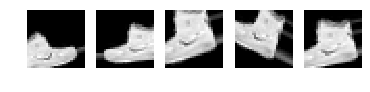

In [24]:
from matplotlib import pyplot as plt
gen = transform_fn.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [25]:
%%time
modelA.fit_generator(transform_fn.flow(x_train,y_train,batch_size=32),
                     steps_per_epoch=len(x_train)/32,
                     epochs=10,
                     callbacks=[EarlyStopping(monitor='loss', patience=5, mode='auto')]
                    )

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0034 - acc: 0.6770
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0026 - acc: 0.7544
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0024 - acc: 0.7725
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0023 - acc: 0.7878
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0022 - acc: 0.7953
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0021 - acc: 0.8044
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0020 - acc: 0.8072
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0020 - acc: 0.8137
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0020 - acc: 0.8163
Epoch 10/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0019 - acc: 0.8175
CPU times

###  Report the final train and validation accuracy

In [26]:
modelA.evaluate(x_train,y_train)

60000/60000 [==============================] - 6s 94us/step


[0.0013652267111620554, 0.87295]

In [27]:
modelA.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 90us/step


[7.677103821563721, 0.5167]

In [28]:
print('The train accuracy is',modelA.evaluate(x_train,y_train)[1])

60000/60000 [==============================] - 6s 95us/step
The train accuracy is 0.87295


In [30]:
print('The test accuracy is',modelA.evaluate(x_test,y_test)[1])

10000/10000 [==============================] - 1s 95us/step
The test accuracy is 0.5167
